# Imports

In [1]:
# %matplotlib notebook
%matplotlib inline

import litstudy.plot
import litstudy.common
import litstudy.search
import litstudy.nlp

from importlib import reload

# import logging
# logging.getLogger().setLevel(logging.INFO)

# One-time scopus configuration file setup
# pybliometrics.scopus.utils.create_config()

# Parameters

In [2]:
scopus_query = 'title-abs-key("predictive maintenance" AND "deep learning")'
dblp_query = '"predictive maintenance" AND "deep learning"'

# Plot statistics

100%|██████████| 3/3 [00:00<00:00, 1378.04it/s]


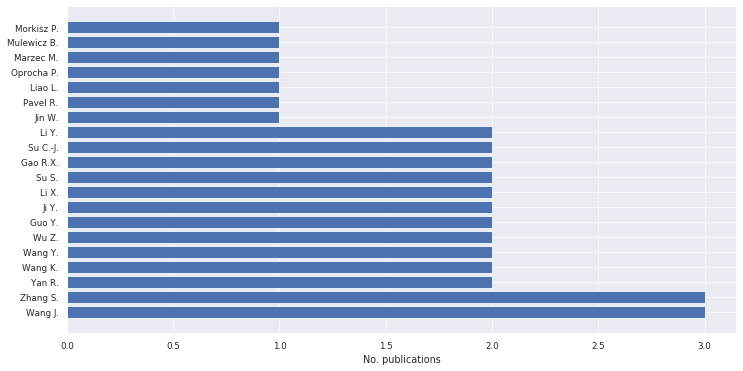

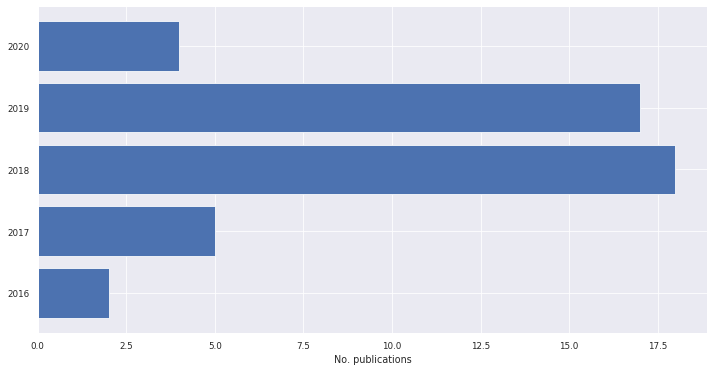

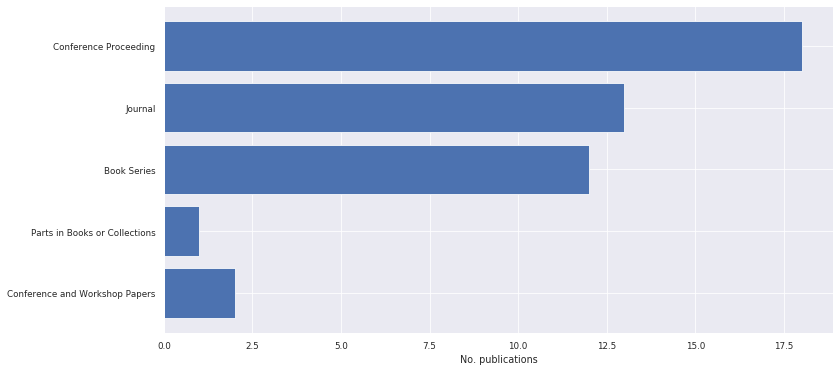

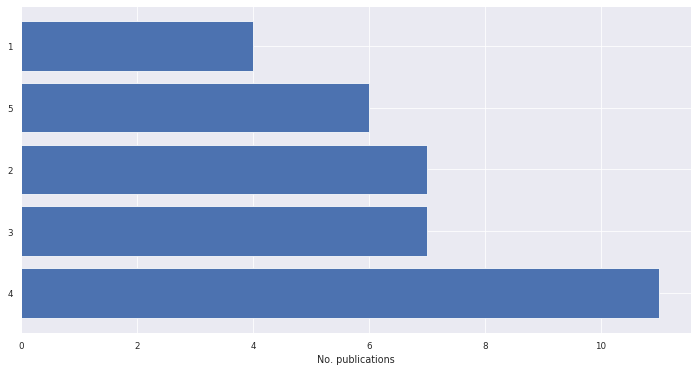

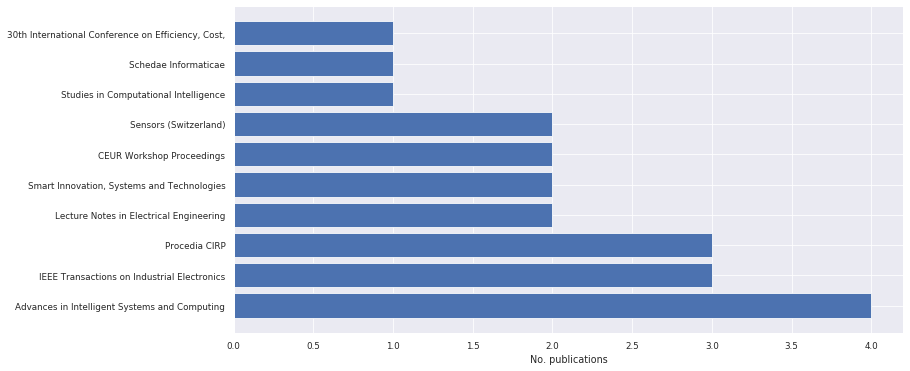

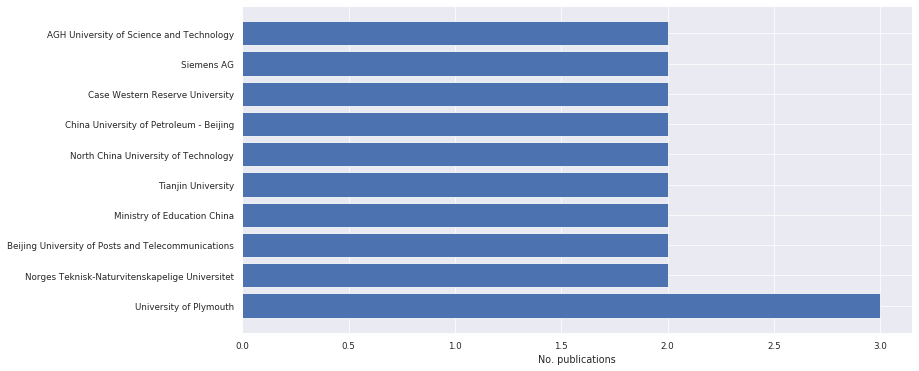

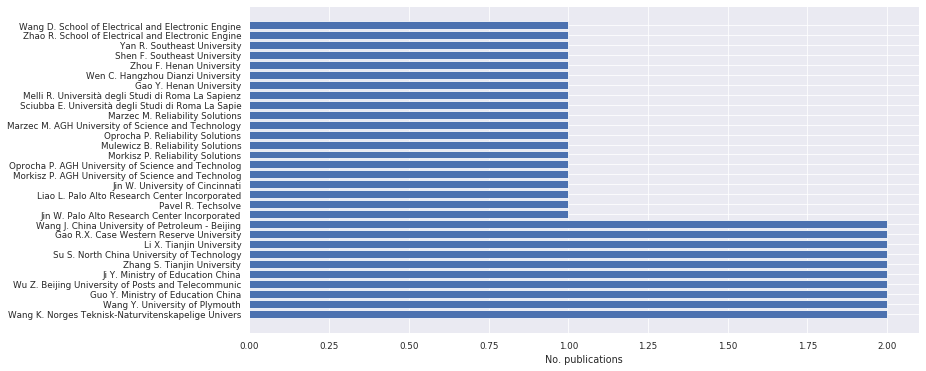

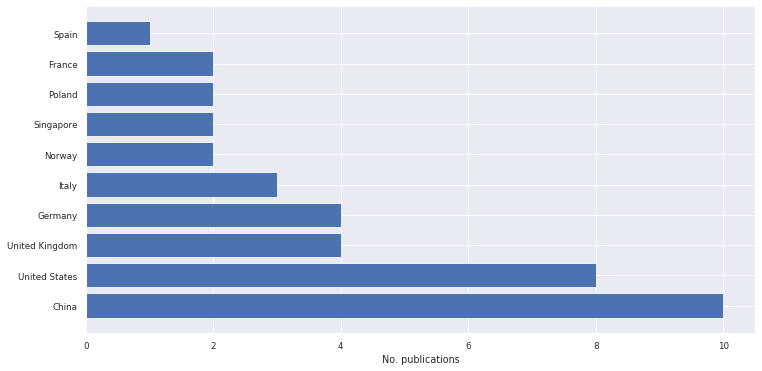

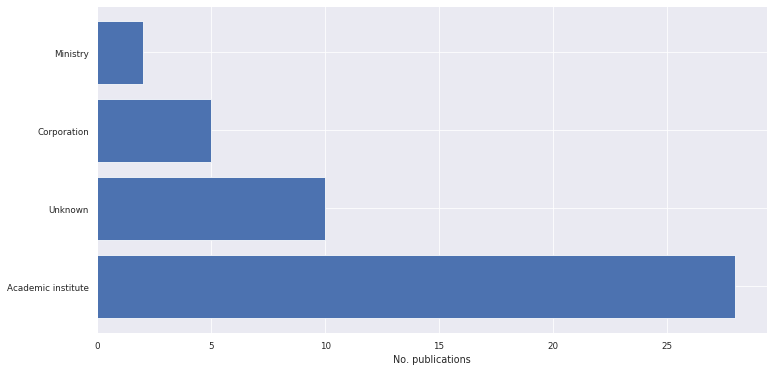

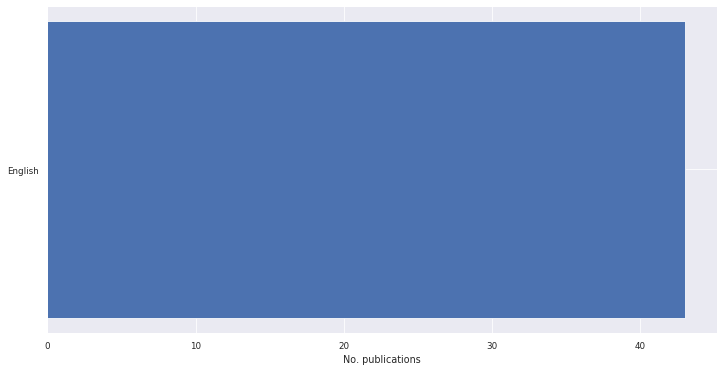

In [33]:
reload(litstudy.plot)
reload(litstudy.common)
reload(litstudy.search)
reload(litstudy.nlp)

docset = litstudy.search.search_scopus(scopus_query)
docset = litstudy.search.search_dblp(dblp_query, docset)
# docset = litstudy.search.search_mockup()

litstudy.plot.plot_author_histogram(docset)
litstudy.plot.plot_year_histogram(docset)
litstudy.plot.plot_source_type_histogram(docset)
litstudy.plot.plot_number_authors_histogram(docset)
litstudy.plot.plot_source_histogram(docset)
litstudy.plot.plot_affiliation_histogram(docset)
litstudy.plot.plot_author_affiliation_histogram(docset)
litstudy.plot.plot_country_histogram(docset)
litstudy.plot.plot_affiliation_type_histogram(docset)
litstudy.plot.plot_language_histogram(docset)

# Train topic models

In [31]:
reload(litstudy.nlp)
reload(litstudy.plot)
dic, freqs = litstudy.nlp.build_corpus_simple(docset)

nmf_model = litstudy.nlp.train_nmf_model(dic, freqs, num_topics=4)
lda_model = litstudy.nlp.train_lda_model(dic, freqs, num_topics=4)

# Plot frequent words, topic clouds and distribution

[t-SNE] Computing 45 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 0.425121
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.313160
[t-SNE] KL divergence after 1000 iterations: 0.326226


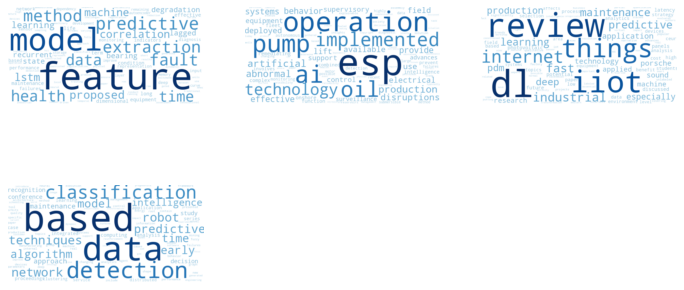

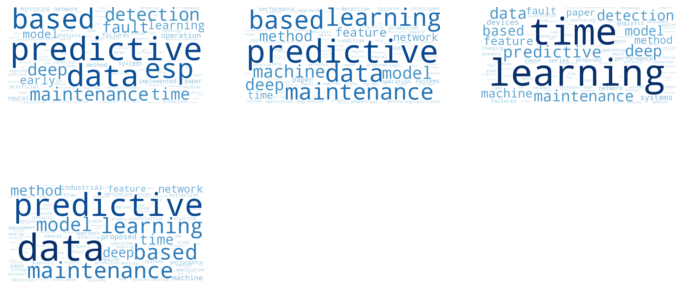

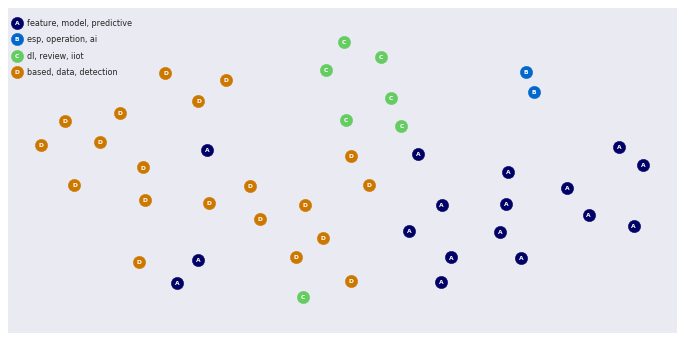

In [32]:
reload(litstudy.nlp)
reload(litstudy.plot)

#litstudy.plot.plot_words_histogram(freqs, dic)

litstudy.plot.plot_topic_clouds(nmf_model)
litstudy.plot.plot_topic_clouds(lda_model)

litstudy.plot.plot_topic_map(nmf_model, dic, freqs)
# litstudy.plot.plot_topic_map(lda_model, dic, freqs)